In [63]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
from sklearn.preprocessing import LabelEncoder


ImportError: cannot import name 'InconsistentVersionWarning' from 'sklearn.exceptions' (C:\Users\Al Gazzar\AppData\Roaming\Python\Python311\site-packages\sklearn\exceptions.py)

In [51]:
students_grading  = pd.read_csv("data\Students_Grading_Dataset_Biased.csv")
                         # ,usecols = ["Age","Total_Score","Study_Hours_per_Week" ,"Student_ID" ,"Attendance (%)","Extracurricular_Activities","Stress_Level (1-10)","Internet_Access_at_Home","Department","Sleep_Hours_per_Night","Participation_Score","Grade"]    )
students_grading.drop(["Student_ID","First_Name","Last_Name","Email"],axis=1, inplace=True)
students_grading.head()


,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


### DATA CLEANING

In [52]:
null_columns =students_grading.columns[students_grading.isna().any()].tolist()
print(null_columns)

['Attendance (%)', 'Assignments_Avg', 'Parent_Education_Level']


In [53]:
students_grading["Attendance (%)"] = students_grading["Attendance (%)"].fillna(students_grading["Attendance (%)"].mean())
students_grading["Assignments_Avg"] = students_grading["Assignments_Avg"].fillna(students_grading["Assignments_Avg"].mean())
students_grading["Parent_Education_Level"] = students_grading["Parent_Education_Level"].fillna("Not Reported")

In [ ]:
df_temp = df.copy()

# Apply Label Encoding only temporarily
label_encoders = {}
for col in df_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])
    label_encoders[col] = le  # Store encoder for future reference

# Compute the correlation matrix
correlation_matrix = df_temp.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

# Find the top correlated column pairs
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations (correlation of a feature with itself)
correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

# Sort by absolute correlation value in descending order
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicate pairs (since correlation is symmetric)
correlation_pairs = correlation_pairs.iloc[::2]

# Print the top correlated column pairs
print("🔍 Top Correlated Column Pairs:")
print(correlation_pairs.head(10))  # Adjust number to see more or fewer pairs


NameError: name 'df' is not defined

### Visualization

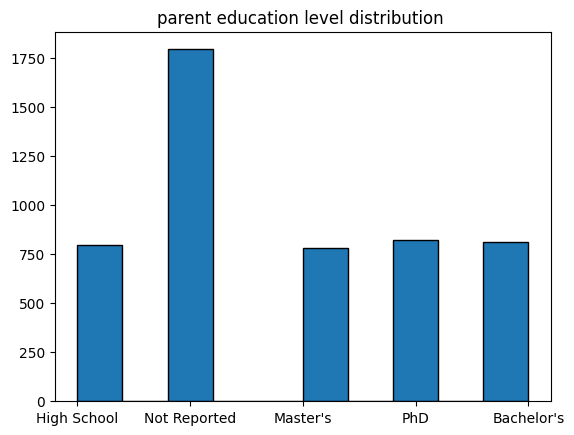

In [54]:
plt.hist(students_grading["Parent_Education_Level"],edgecolor='black')
plt.title("parent education level distribution ")
plt.show() 

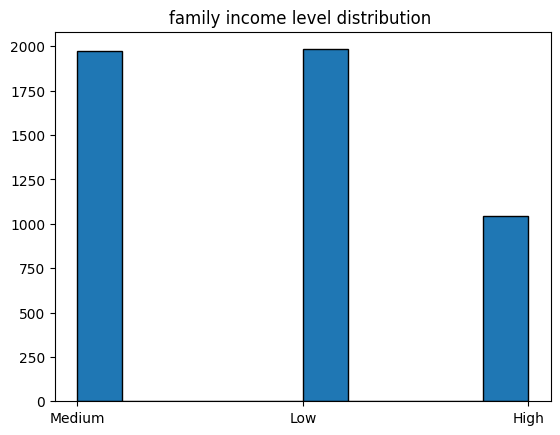

In [55]:
plt.hist(students_grading["Family_Income_Level"],edgecolor='black')
plt.title("family income level distribution ")
plt.show() 

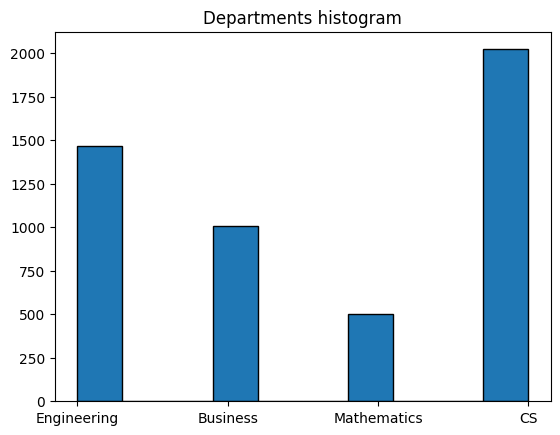

In [56]:
plt.hist(students_grading["Department"],edgecolor='black')
plt.title("Departments histogram")
plt.show() 

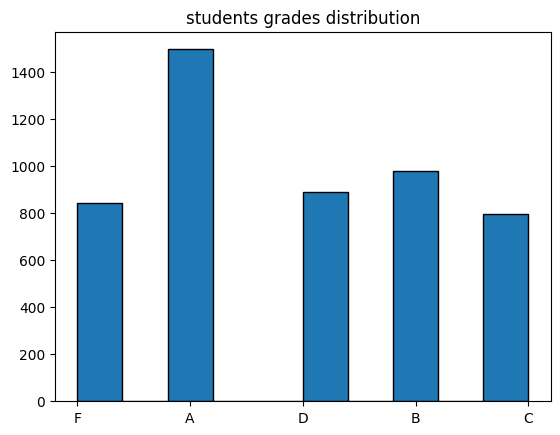

In [57]:
plt.hist(students_grading["Grade"],edgecolor='black')
plt.title("students grades distribution")
plt.show() 

Text(0, 0.5, 'Frequency')

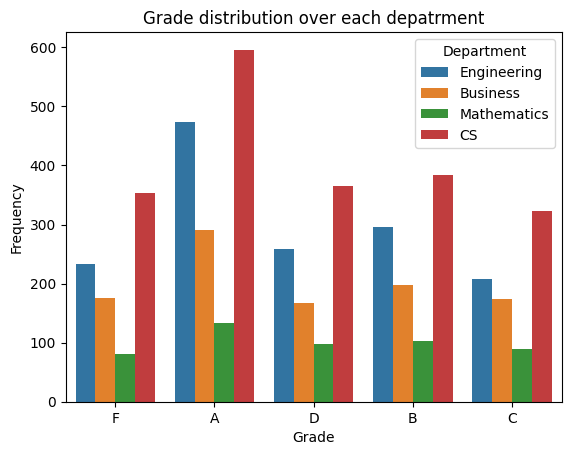

In [58]:
sns.countplot(data=students_grading, x='Grade', hue = 'Department')
plt.title('Grade distribution over each depatrment')
plt.xlabel('Grade')
plt.ylabel('Frequency')

In [59]:
correlation_matrix= students_grading.corr(method="pearson",numeric_only=False)
print(correlation_matrix)

ValueError: could not convert string to float: 'Female'

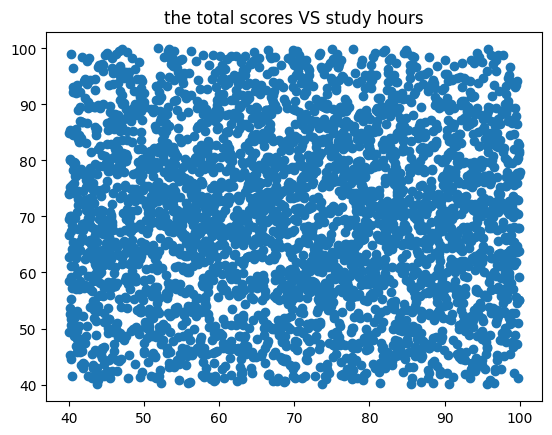

In [ ]:
scores_and_studyHours = students_grading[["Midterm_Score","Final_Score"]].groupby("Midterm_Score").mean().reset_index()
plt.scatter( scores_and_studyHours["Midterm_Score"], scores_and_studyHours["Final_Score"])
plt.title("the total scores VS study hours")
plt.show()

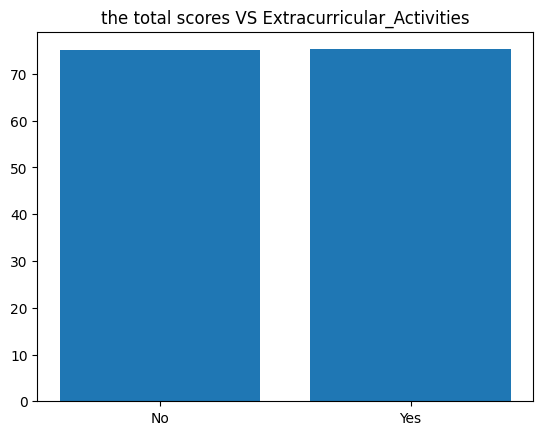

In [ ]:
scores_and_Activities = students_grading[["Extracurricular_Activities","Total_Score"]].groupby("Extracurricular_Activities").mean().reset_index()
plt.bar(scores_and_Activities["Extracurricular_Activities"],scores_and_Activities["Total_Score"])
plt.title("the total scores VS Extracurricular_Activities")
plt.show()

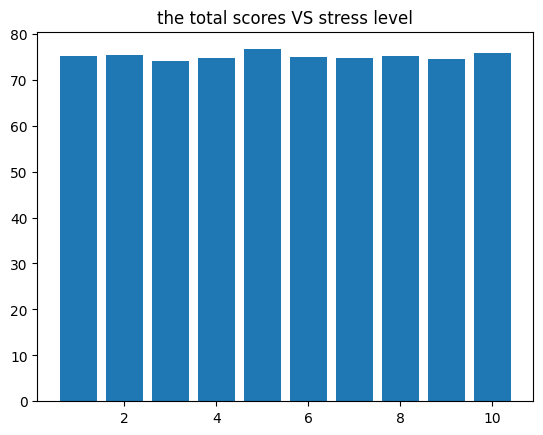

In [ ]:
scores_and_stressLevel = students_grading[["Stress_Level (1-10)","Total_Score"]].groupby("Stress_Level (1-10)").mean().reset_index()
plt.bar(scores_and_stressLevel["Stress_Level (1-10)"],scores_and_stressLevel["Total_Score"])
plt.title("the total scores VS stress level")
plt.show()

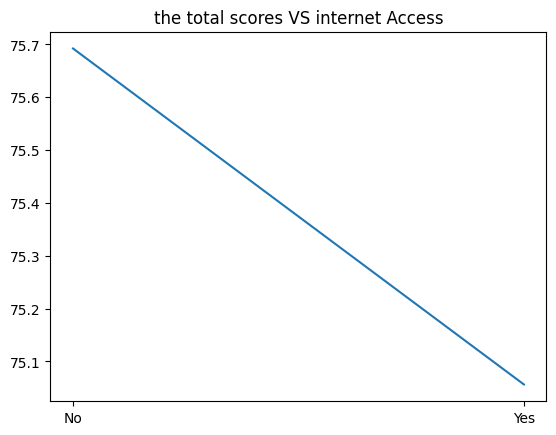

In [ ]:
scores_and_internetAccess= students_grading[["Internet_Access_at_Home","Total_Score"]].groupby("Internet_Access_at_Home").mean().reset_index()
plt.plot(scores_and_internetAccess["Internet_Access_at_Home"],scores_and_internetAccess["Total_Score"])
plt.title("the total scores VS internet Access")
plt.show()

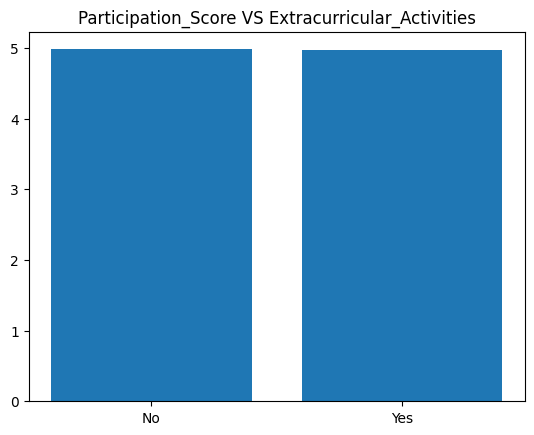

In [ ]:
scores_and_participation  = students_grading[["Extracurricular_Activities","Participation_Score"]].groupby("Extracurricular_Activities").mean().reset_index()
plt.bar(scores_and_participation["Extracurricular_Activities"],scores_and_participation["Participation_Score"])
plt.title("Participation_Score VS Extracurricular_Activities")
plt.show()

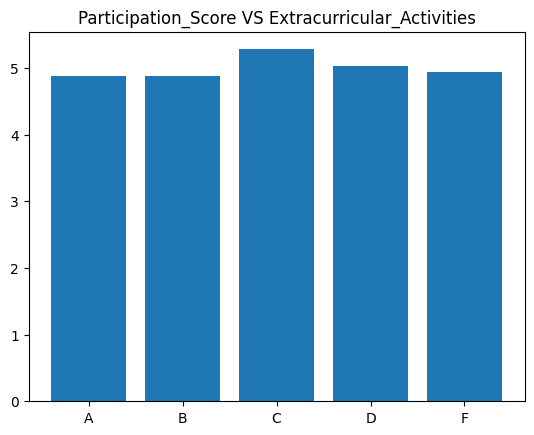

In [ ]:
scores_and_participation  = students_grading[["Grade","Participation_Score"]].groupby("Grade").mean().reset_index()
plt.bar(scores_and_participation["Grade"],scores_and_participation["Participation_Score"])
plt.title("Participation_Score VS Extracurricular_Activities")
plt.show()